:orphan:
# Plotting Linear Regression
Simple case with only $\theta_1$

In [257]:
from myst_nb import glue
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from itertools import chain

## For illustration: 3D 'bowl'
Source: https://www.alphacodingskills.com/matplotlib/matplotlib-3d-contour-plot.php 

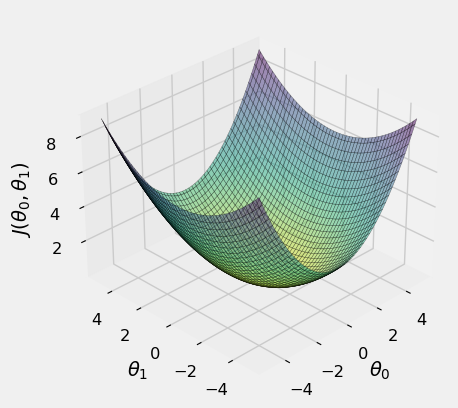

In [265]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("fivethirtyeight")
params = {
        'xtick.labelsize':'small',
        'ytick.labelsize':'small',
        'axes.labelsize': 'medium'}
plt.rcParams.update(params)

xlist = np.linspace(-5.0, 5.0, 100)
ylist = ylist = np.linspace(-5.0, 5.0, 100)
X, Y = np.meshgrid(xlist, ylist)

#creating elliptical plane
Z = (X**2)/4 + (Y**2)/9

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#drawing contour plot
surf = ax.plot_surface(X,Y,Z, cmap='viridis_r', linewidth=0.3, alpha = 0.5, edgecolor = 'k')
#cb = ax.contour(X, Y, Z, 100)

#ax.set_title('3D Contour Plot')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$') 
ax.set_zlabel('$J(\\theta_0, \\theta_1)$', rotation='90')
#plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 15)
ax.azim = 225
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)

glue("plot_linReg_bowl", fig, display=False)


## Cost function by hand with 4 points

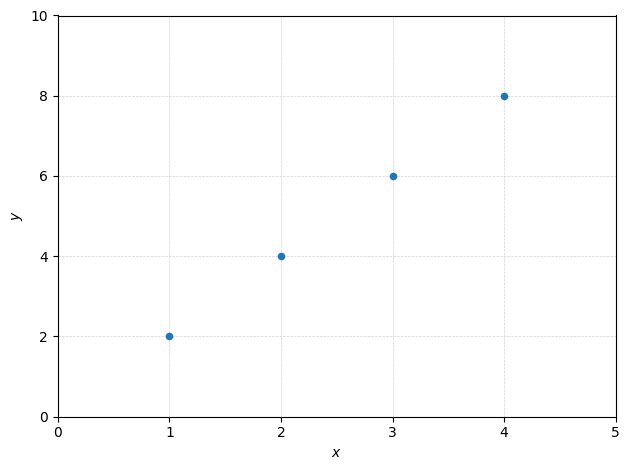

In [55]:
plt.rcParams.update(plt.rcParamsDefault)

fig, ax = plt.subplots()
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]

# Draw a grid:
ax.set_axisbelow(True)
ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5)

ax.set_xlim([0, 5])
ax.set_ylim([0, 10])

ax.scatter(x, y, s=20)
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')
plt.tight_layout()

glue("plot_linReg_1234", fig, display=False)


In [140]:
def h_lin(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

def costFunctionLinRegression( x_vals, y_vals, theta_0, theta_1): # x and y are lists
    
    m = len(x_vals)

    if m != len(y_vals):
        raise ValueError('The lists of x and y values are not the same length!')

    sum_error_squared = 0

    for x , y in zip(x_vals, y_vals):
        sum_error_squared  += ( h_lin(theta_0, theta_1, x) - y )**2 
    
    return (1/(2*m)) * sum_error_squared

In [141]:
theta_0 = 0

print("The x values:")
print(x)
print("The y values:")
print(y)

theta_1_vals = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
costs = []
for theta_1 in theta_1_vals:
    cost = costFunctionLinRegression( x, y, theta_0, theta_1)
    print("With theta = %.1f\tcost = %.2f" %(theta_1, cost))
    costs.append(cost)

print(costs)

The x values:
[1, 2, 3, 4]
The y values:
[2, 4, 6, 8]
With theta = 0.0	cost = 15.00
With theta = 0.5	cost = 8.44
With theta = 1.0	cost = 3.75
With theta = 1.5	cost = 0.94
With theta = 2.0	cost = 0.00
With theta = 2.5	cost = 0.94
With theta = 3.0	cost = 3.75
With theta = 3.5	cost = 8.44
[15.0, 8.4375, 3.75, 0.9375, 0.0, 0.9375, 3.75, 8.4375]


Plotting now the cost function w.r.t. parameter theta 1:

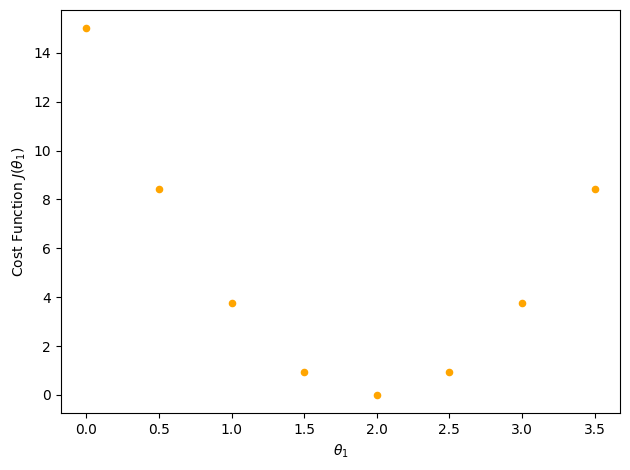

In [143]:
plt.rcParams.update(plt.rcParamsDefault)

fig, ax = plt.subplots()

ax.scatter(theta_1_vals, costs, c='orange', s=20)
ax.set_xlabel('$\\theta_1$') 
ax.set_ylabel('Cost Function $J(\\theta_1)$')
plt.tight_layout()

glue("plot_linReg_costvstheta1", fig, display=False)


## The data example

Here are some data:

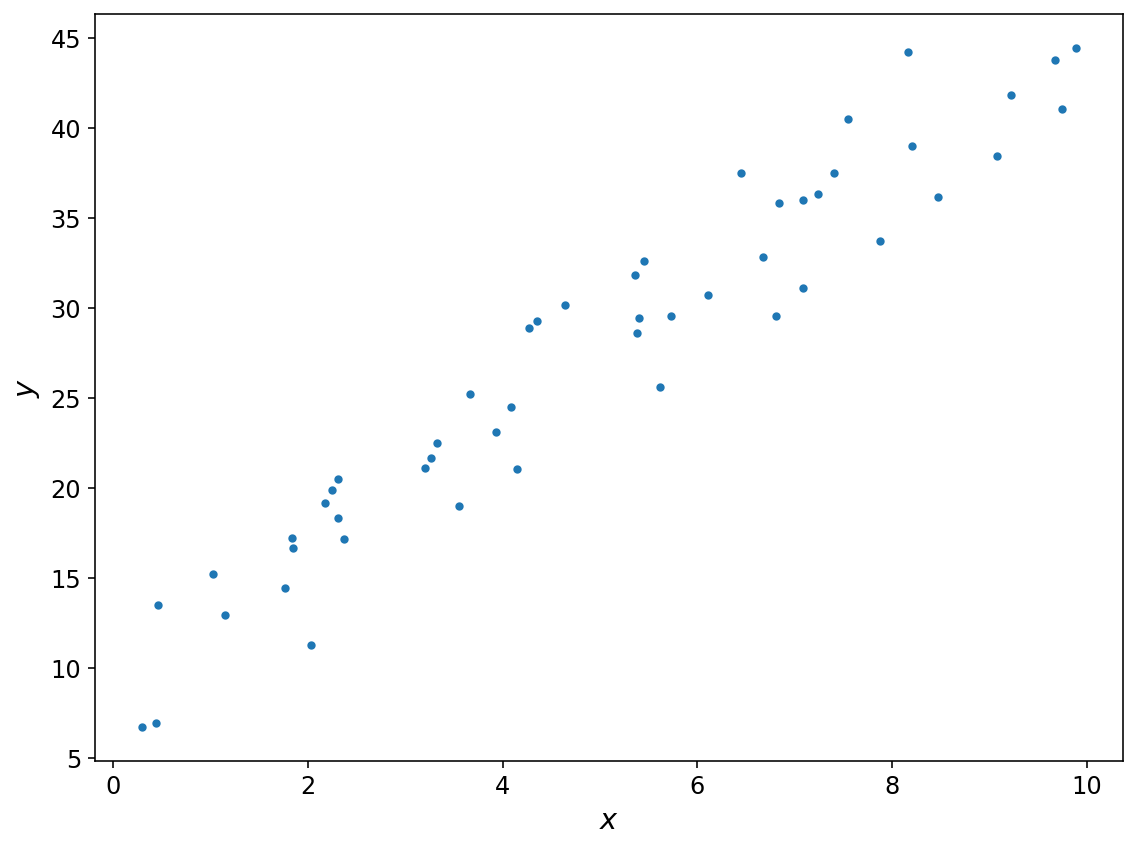

In [223]:
x = 10*np.random.rand(50)
y = 2 + 4 * x + 10*np.random.rand(50)

fig, ax = plt.subplots()
ax.scatter(x, y, s=10)
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')
plt.tight_layout()

glue("plot_linReg_50pts", fig, display=False)


In [270]:
def residuals(v, x, y):
    return y - (v[0]*x+v[1])

res = scipy.optimize.least_squares(residuals, x0=[0, 0], args=(x,y))
print(f"best-fit line: {res.x[0]:.3f}*x + {res.x[1]:.3f}")

best-fit line: 3.525*x + 9.875


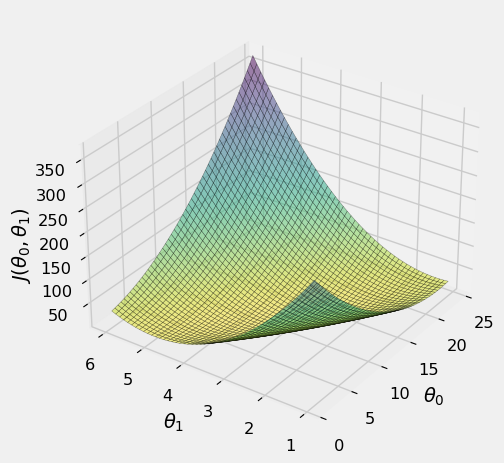

In [272]:
theta_0_vals = np.linspace(1, 24, 50)
theta_1_vals = np.linspace(1, 6, 50)

Theta0, Theta1 = np.meshgrid(theta_0_vals, theta_1_vals)

Costs = costFunctionLinRegression( x, y, Theta0, Theta1 )

plt.style.use("fivethirtyeight")
params = {
        'xtick.labelsize':'small',
        'ytick.labelsize':'small',
        'axes.labelsize': 'medium'}
plt.rcParams.update(params)

fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(Theta0, Theta1, Costs, cmap='viridis_r', linewidth=0.3, alpha = 0.5, edgecolor = 'k')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('$J(\\theta_0, \\theta_1)$', rotation=90)
ax.azim = 215 # 225
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
#plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 15)
plt.tight_layout()

glue("plot_linReg_3D", fig, display=False)



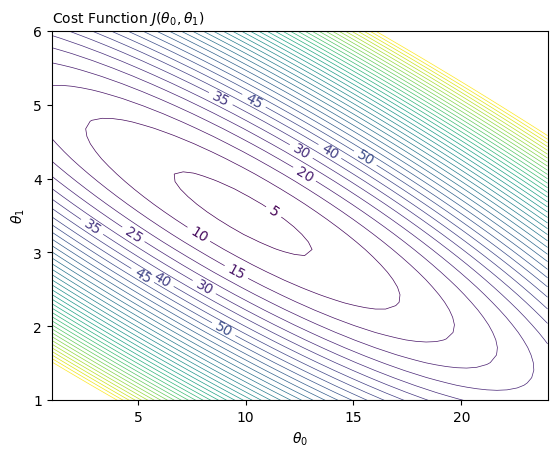

In [273]:
plt.rcParams.update(plt.rcParamsDefault)

levs = range(5,200,5) #chain(range(0,50,5), range(50,200, 10))

fig, ax = plt.subplots()
CS = ax.contour(Theta0, Theta1, Costs, levs, linewidths=0.5)
ax.clabel(CS, CS.levels[0:10], inline=1, fontsize=10, fmt='%d')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 10)

glue("plot_linReg_contour", fig, display=False)

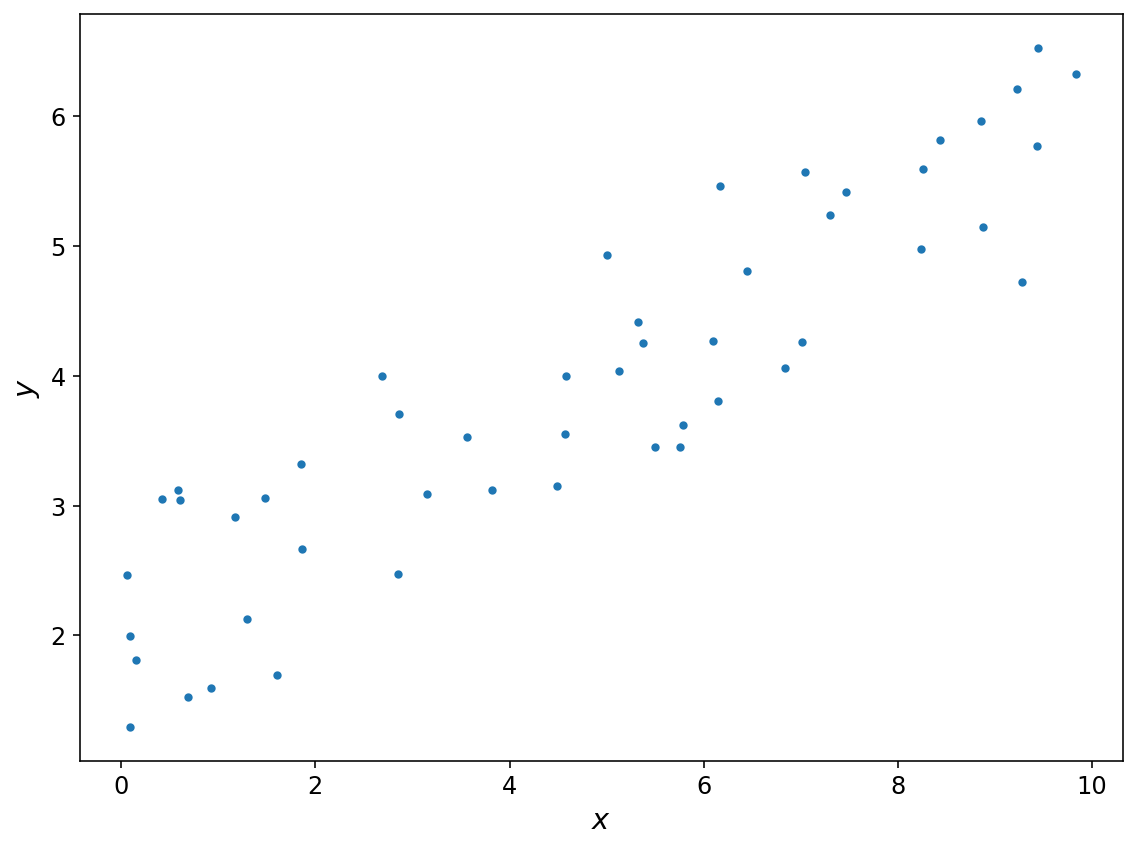

In [220]:
plt.rcParams.update(plt.rcParamsDefault)
params = {
        #'legend.fontsize': 'x-large',
        'figure.figsize': (8.0, 6.0),
        'figure.dpi': 144.0,
        'axes.labelsize': 'x-large',
        'axes.titlesize': 'large',
        'xtick.labelsize':'large',
        'ytick.labelsize':'large'}
plt.rcParams.update(params)

# generate random data-set
#np.random.seed(0)
#x_vals = np.random.rand(50)
##y_vals = 50 + 0.1 * x_vals + 30*np.random.rand(50, 1)
#y_vals = 1 + x_vals + 0.1*np.random.rand(50)

#x_vals = np.linspace(0, 10, 100) 
x_vals = 10*np.random.rand(50)
delta = np.random.uniform(-1, 1, x_vals.size)
y_vals = 0.4*x_vals + 2 + delta


# plot
fig, ax = plt.subplots()
ax.scatter(x_vals, y_vals, s=10)
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')
plt.tight_layout()


glue("plot_linReg_50pts", fig, display=False)

Ok let's try a contour plot. It's the plan for the tutorial anyway.
Let's define some lists of theta 0 and theta 1.
Then cost function. Then contour 3D then contour 2D ... You can do it.

In [221]:
res = scipy.optimize.least_squares(residuals, x0=[0, 0], args=(x_vals,y_vals))
print(f"best-fit line: {res.x[0]:.3f}*x + {res.x[1]:.3f}")

best-fit line: 0.404*x + 2.001


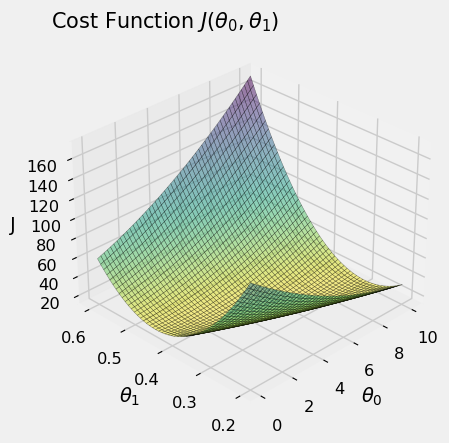

In [182]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("fivethirtyeight")
params = {
        #'legend.fontsize': 'x-large',
       #'figure.figsize': (8.0, 6.0),
        #'figure.dpi': 144.0,
        #'axes.titlesize': 'large',
        'xtick.labelsize':'small',
        'ytick.labelsize':'small',
        'axes.labelsize': 'medium'}
plt.rcParams.update(params)


#===== t0 ~ 2    t1 ~ 2.5
#theta_0_vals = np.linspace(0, 4, 100)
#theta_0_vals = np.linspace(-55, 60, 100)
#theta_0_vals = np.linspace(-30, 30, 100)
#theta_1_vals = np.linspace(0, 5, 100)
#theta_1_vals = np.linspace(-15, 5, 100)

#===== t0 ~ 50    t1 ~ 0.1 
#theta_0_vals = np.linspace(0, 100, 100)
#theta_1_vals = np.linspace(-.2, 0.2, 100)

#===== t0 ~ 1    t1 ~ 1
#theta_0_vals = np.linspace(0, 2, 50)
#theta_1_vals = np.linspace(0, 2, 50)

#===== y_vals = 0.4*x_vals + 3 + delta   t0 ~ 3 , t1 ~ 0.4
theta_0_vals = np.linspace(0, 10, 50)
theta_1_vals = np.linspace(0.2, 0.6, 50)

#===== best-fit line: 0.990*x + 1.059




Theta0, Theta1 = np.meshgrid(theta_0_vals, theta_1_vals)

Costs = costFunctionLinRegression( x_vals, y_vals, Theta0, Theta1 )



fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(Theta0, Theta1, Costs )

surf = ax.plot_surface(Theta0, Theta1, Costs, cmap='viridis_r', linewidth=0.3, alpha = 0.5, edgecolor = 'k')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$')
ax.set_zlabel('J') #Cost Function $J(\\theta_0, \\theta_1)$')
ax.azim = 225
ax.xaxis.set_rotate_label(False)
ax.yaxis.set_rotate_label(False)
ax.zaxis.set_rotate_label(False)
plt.title('Cost Function $J(\\theta_0, \\theta_1)$', loc='left', fontsize = 15)

plt.show()






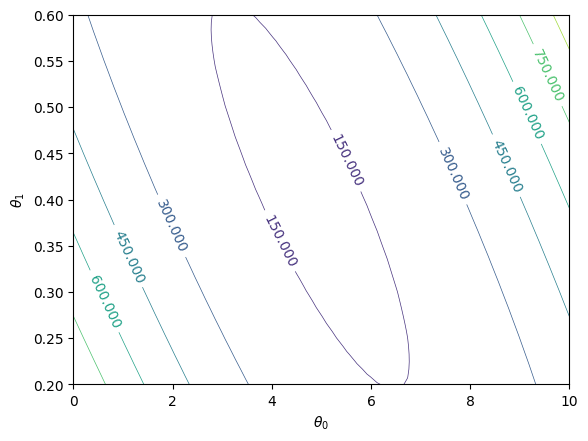

In [208]:
#fig, ax = plt.subplots(figsize=(12,12))
#ax.imshow(Costs)
#ax.set_xlabel('$\\theta_0$')
#ax.set_ylabel('$\\theta_1$');
plt.rcParams.update(plt.rcParamsDefault)


theta_0_vals = np.linspace(0, 10, 50)
theta_1_vals = np.linspace(0.2, 0.6, 50)
Theta0, Theta1 = np.meshgrid(theta_0_vals, theta_1_vals)

fig, ax = plt.subplots()
CS = ax.contour(Theta0, Theta1, Costs, linewidths=0.5)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$');



